<a href="https://colab.research.google.com/github/MrAdithya21/Amazon-Sales-Data-Sentiment-Analysis/blob/main/Unlocking_Customer_Insights_A_Sentiment_Analysis_of_Amazon_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unlocking Customer Insights: A Sentiment Analysis of Amazon Product Reviews**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px

# Load the dataset
file_path = '/content/amazon.csv'
data = pd.read_csv(file_path)

# Display dataset preview
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349     

In [ ]:
# Display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# **Dataset Overview**

The dataset contains information about various products sold on Amazon, including their categories, pricing, reviews, ratings, and customer feedback. Key columns in the dataset include:
- `product_id`: Unique identifier for each product.
- `product_name`: Name of the product.
- `category`: Category or subcategories of the product.
- `discounted_price` and `actual_price`: Pricing details including discounts.
- `discount_percentage`: The percentage discount applied to the product.
- `rating`: Customer ratings on a scale of 1 to 5.
- `rating_count`: The total number of ratings received by the product.
- `review_title` and `review_content`: Feedback provided by customers.
- `img_link` and `product_link`: Links to the product image and Amazon page.

The goal of this analysis is to extract insights related to customer sentiment, product pricing, and category performance. Further, we aim to explore statistical relationships between various features like ratings, discount percentages, and reviews.


In [ ]:
# Handle missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [ ]:
data.fillna({'rating_count': 0, 'review_content': ''}, inplace=True)  # Fill missing ratings with 0 and reviews with an empty string
print(data.isnull().sum())


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


# **Handling Missing Values**

### Observation:
Upon checking for missing values in the dataset, it was found that only the `rating_count` column contains missing values (2 missing entries). All other columns are complete, with no missing values.

### Approach:
To ensure the dataset is complete and ready for analysis:
1. **Inspect the Column**:
   - The `rating_count` column represents the number of ratings received by each product.
   - Missing values in this column could indicate products with no customer engagement or errors in data collection.

2. **Imputation Strategy**:
   - Since the `rating_count` column is numeric and represents counts, the missing values are imputed with a value of `0`, indicating no ratings for these products.

3. **Rationale**:
   - Imputing `0` aligns with the logical assumption that missing values in `rating_count` likely mean no ratings were received.
   - This ensures consistency across the dataset without introducing bias.

4. **Verification**:
   - After imputation, the dataset is rechecked to confirm there are no remaining missing values.



In [ ]:

# Remove duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Standardize column names (optional)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Display updated dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1465 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Sentiment Distribution:
sentiment
positive    1438
negative      26
neutral        1
Name: count, dtype: int64


<ipython-input-7-bd7d48ab5e23>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='pastel')


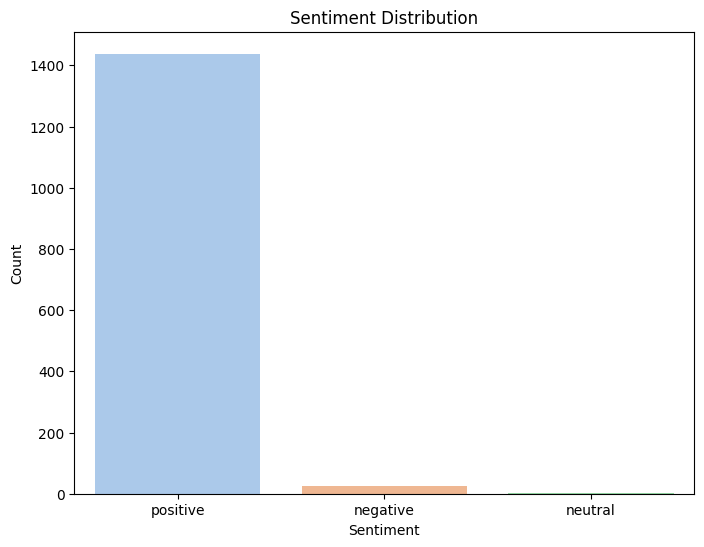

In [ ]:
# Define a function to analyze sentiment
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return 'positive' if analysis.sentiment.polarity > 0 else ('negative' if analysis.sentiment.polarity < 0 else 'neutral')

# Apply sentiment analysis to the review column
data['sentiment'] = data['review_content'].apply(analyze_sentiment)

# Display sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# **Sentiment Distribution**

### Observation:
The bar chart represents the distribution of customer sentiments across all product reviews in the dataset. Sentiments are classified into three categories:
1. **Positive**: Indicates favorable customer feedback.
2. **Negative**: Indicates unfavorable customer feedback.
3. **Neutral**: Indicates indifferent or balanced customer feedback.

### Key Insights:
1. **Dominance of Positive Sentiments**:
   - A large majority of the reviews are classified as **positive**, suggesting that most customers are satisfied with the products they purchased.
   - This could reflect high-quality products or effective customer service.

2. **Minimal Negative and Neutral Sentiments**:
   - The number of **negative** reviews is significantly lower compared to positive reviews.
   - **Neutral** reviews are almost negligible, indicating that customers tend to express clear opinions about the products.

### Interpretation:
The overwhelming number of positive sentiments is a strong indicator of customer satisfaction. However, the few negative reviews should be further analyzed to identify recurring issues or areas for improvement. For example:
- Are negative reviews linked to specific product categories or attributes (e.g., quality, pricing)?
- Are there any keywords or patterns in the negative reviews that can provide actionable insights?



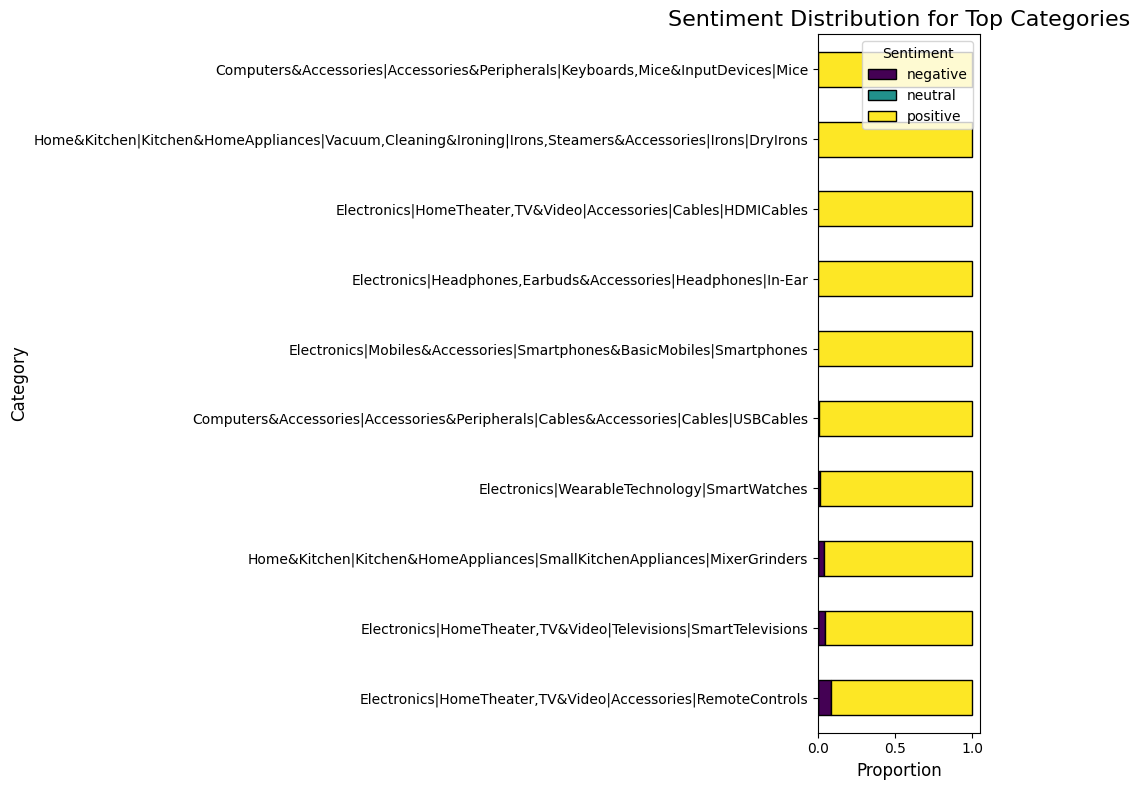

In [ ]:
# Calculate sentiment proportions by category
category_sentiment = data.groupby('category')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Filter top categories based on the number of reviews
top_categories = data['category'].value_counts().head(10).index
top_category_sentiment = category_sentiment.loc[top_categories]

# Sort categories by the proportion of negative sentiments
top_category_sentiment = top_category_sentiment.sort_values(by='negative', ascending=False)

# Visualize sentiment distribution with a horizontal bar chart
top_category_sentiment.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='viridis', edgecolor='black')

plt.title('Sentiment Distribution for Top Categories', fontsize=16)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.legend(title='Sentiment', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


# **Sentiment Distribution for Top Categories**

### Observation:
The horizontal bar chart represents the sentiment distribution for the top 10 product categories, based on the number of reviews. Sentiments are classified into **positive**, **neutral**, and **negative**, and their proportions are displayed for each category.

### Key Insights:
1. **Predominance of Positive Sentiments**:
   - All top categories exhibit a high proportion of **positive sentiments**, indicating general customer satisfaction.
   - Categories like "Smartwatches," "Smartphones," and "Mixer Grinders" show nearly 100% positive feedback.

2. **Negative Sentiments as Indicators**:
   - A small but noticeable proportion of **negative sentiments** is observed in categories such as:
     - "Smart Televisions"
     - "Remote Controls"
   - These categories may have quality or functionality issues that need further investigation.

3. **Minimal Neutral Sentiments**:
   - Most categories have almost negligible **neutral sentiments**, showing that customers tend to express strong opinions (positive or negative) rather than indifferent feedback.

### Interpretation:
- Categories with high proportions of positive feedback, such as "USB Cables" and "HDMI Cables," could be flagship performers with reliable product quality.
- Categories with a noticeable share of negative feedback, such as "Remote Controls," require focused improvement efforts, such as addressing customer complaints or improving product features.


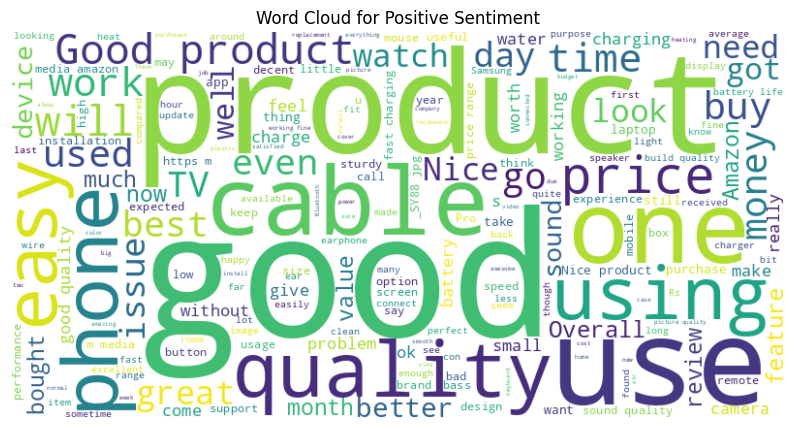

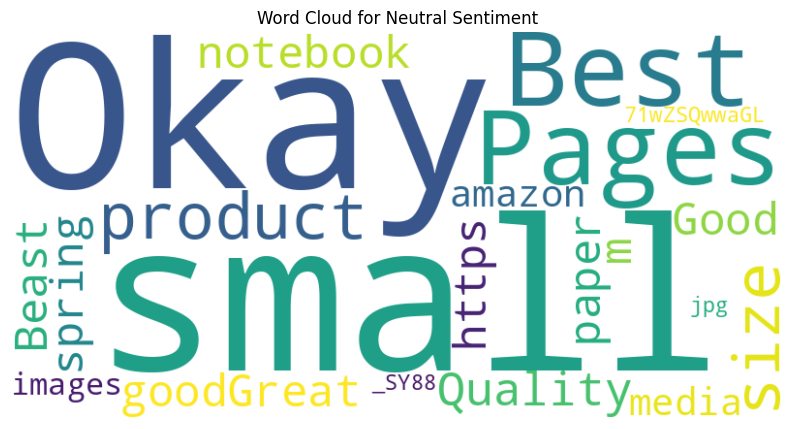

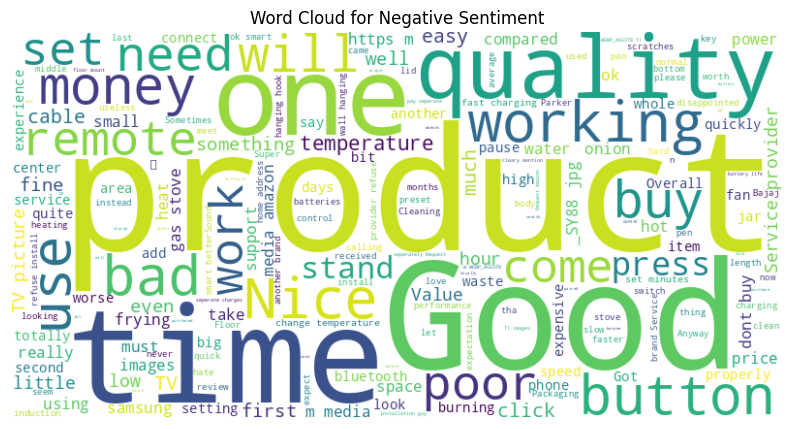

In [ ]:
# Generate word clouds for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    sentiment_reviews = " ".join(review for review in data[data['sentiment'] == sentiment]['review_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_reviews)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

# **Word Cloud Analysis for Customer Reviews**

### Overview:
The word clouds illustrate the most frequently occurring words in customer reviews categorized by sentiment:
1. **Positive Sentiment**: Reviews with favorable feedback.
2. **Neutral Sentiment**: Reviews that are neither clearly positive nor negative.
3. **Negative Sentiment**: Reviews expressing dissatisfaction or issues.

---

### **Positive Sentiment Word Cloud**
- **Key Observations**:
  - Words like **"good," "quality," "price," "use," and "product"** dominate the positive sentiment word cloud.
  - Customers frequently mention attributes like **"easy," "value," and "great"**, reflecting overall satisfaction with product quality, usability, and value for money.
  - Specific references to products, such as **"phone," "cable," and "watch,"** suggest high customer satisfaction in these categories.

- **Interpretation**:
  - Positive reviews emphasize product quality, functionality, and value for money as the primary reasons for customer satisfaction.
  - These attributes can be leveraged in marketing campaigns to attract more customers.

---

### **Neutral Sentiment Word Cloud**
- **Key Observations**:
  - Common terms include **"okay," "size," "pages," and "product"**.
  - Words like **"media," "paper," and "images"** indicate reviews with balanced or non-opinionated feedback.
  - The neutral sentiment word cloud suggests that customers may be describing basic product details without strong emotional tones.

- **Interpretation**:
  - Neutral reviews often lack detailed feedback, which could be due to customers finding the product to meet, but not exceed, their expectations.
  - These reviews are valuable for understanding where product features may need improvement to convert neutral sentiment into positive.

---

### **Negative Sentiment Word Cloud**
- **Key Observations**:
  - Words like **"bad," "poor," "working," "quality," and "button"** dominate negative reviews.
  - Complaints often revolve around functionality issues (**"remote," "time," "use," "press"**) and quality concerns (**"temperature," "set," "low"**).
  - Specific product mentions such as **"remote," "stove," and "money"** highlight areas needing improvement.

- **Interpretation**:
  - Negative reviews provide critical insights into product weaknesses or failure points, such as issues with build quality, usability, and reliability.
  - Addressing these concerns through quality control and enhanced customer support can significantly reduce negative feedback.

---



In [ ]:
# Inspect unique values in the rating column
print("Unique values in the rating column:")
print(data['rating'].unique())

# Replace invalid values
data['rating'] = data['rating'].replace('|', np.nan)

# Remove rows with invalid rating formats (optional)
data = data[data['rating'].str.match(r'^\d+(\.\d+)?$', na=False)]

# Extract numeric values from the rating column
data['rating'] = data['rating'].str.extract(r'(\d+(\.\d+)?)')[0]

# Convert to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Fill missing values with 0
data['rating'].fillna(0, inplace=True)

# Verify the changes
print("Data types after cleaning:")
print(data.dtypes)
print("Missing values after cleaning:")
print(data.isnull().sum())


Unique values in the rating column:
['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']
Data types after cleaning:
product_id              object
product_name            object
category                object
discounted_price        object
actual_price            object
discount_percentage     object
rating                 float64
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
sentiment               object
dtype: object
Missing values after cleaning:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
a

<ipython-input-10-94d7278b2351>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].str.extract(r'(\d+(\.\d+)?)')[0]
<ipython-input-10-94d7278b2351>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
<ipython-input-10-94d7278b2351>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace 

<ipython-input-11-67cdd53c8495>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='viridis')


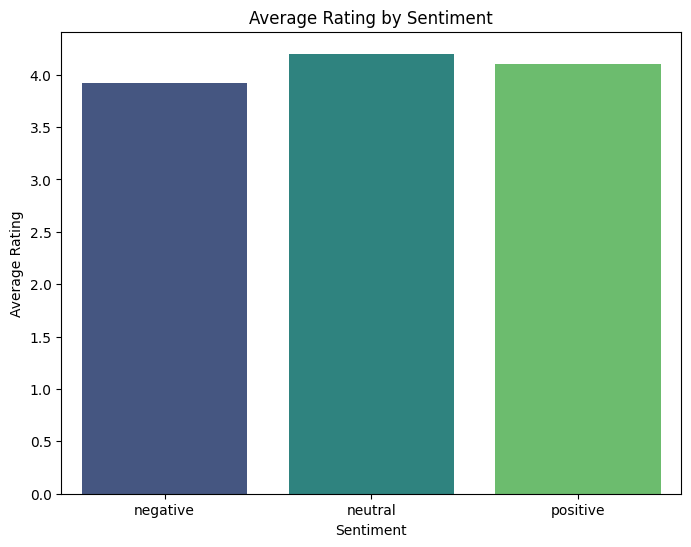

In [ ]:
# Calculate average ratings by sentiment
avg_ratings = data.groupby('sentiment')['rating'].mean()

# Visualize average ratings
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='viridis')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()


# **Average Rating by Sentiment**

### Observation:
The bar chart represents the average customer ratings for each sentiment category: **positive**, **neutral**, and **negative**.

### Key Insights:
1. **High Ratings Across Sentiments**:
   - All three sentiment categories show average ratings close to or above 4, indicating an overall favorable perception of the products.

2. **Negative Sentiments with High Ratings**:
   - Surprisingly, even negative sentiments have an average rating close to 4. This may suggest that customers who leave negative reviews might still rate products generously, or they may express minor dissatisfaction while overall being content with the product.

3. **Neutral Sentiments with the Highest Average**:
   - Neutral sentiments have the highest average rating. This could indicate that customers who feel indifferent about a product still find it satisfactory but lack enthusiasm to provide a highly positive review.

4. **Positive Sentiments as Expected**:
   - Positive sentiments maintain a high average rating, reflecting high levels of satisfaction from customers.

### Interpretation:
- The high ratings across all sentiments may indicate a potential bias in customer feedback where most customers rate products positively despite expressing negative or neutral sentiments in their reviews.
- The chart suggests that numerical ratings alone may not fully capture the sentiment or emotional tone of the reviews.


In [ ]:
from scipy.stats import chi2_contingency, f_oneway, pearsonr, shapiro, ttest_ind

# Chi-Square Test for Independence
contingency_table = pd.crosstab(data['category'], data['sentiment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("The sentiment distribution across categories is significantly different.")
else:
    print("No significant difference in sentiment distribution across categories.")


Chi-Square Test Results:
Chi-Square Statistic: 330.72620253432393
P-value: 0.9995282885522159
No significant difference in sentiment distribution across categories.


# **Chi-Square Test for Independence**

### Objective:
The Chi-Square Test for Independence was performed to assess whether the distribution of sentiments (positive, neutral, negative) is significantly different across product categories.

### Results:
- **Chi-Square Statistic**: 330.73
- **P-value**: 0.9995

### Interpretation:
1. **No Significant Difference**:
   - The high p-value (0.9995) indicates that we fail to reject the null hypothesis.
   - This means there is **no statistically significant difference** in the sentiment distribution across categories.
   - In simpler terms, the proportions of positive, neutral, and negative sentiments appear to be similar across all product categories.

2. **Uniform Sentiment Trends**:
   - The results suggest that customers tend to express sentiments similarly regardless of the product category.
   - For instance, the tendency to leave positive or negative reviews is not significantly influenced by the type of product being reviewed.

### Possible Reasons for the Results:
- **Dataset Characteristics**:
   - If most sentiments are overwhelmingly positive (as seen in earlier analyses), this uniformity might overshadow potential differences across categories.
   - Some categories may lack sufficient variation in sentiment proportions to detect significant differences.

- **Customer Behavior**:
   - Customers may share similar sentiment patterns due to consistent product quality, pricing, or customer service across categories.


### Conclusion:
The Chi-Square Test reveals no significant difference in sentiment distribution across categories, suggesting consistent customer feedback trends regardless of the product type. Future analyses should consider combining sentiment and rating data or investigating specific product-level feedback for actionable insights.


In [ ]:
# ANOVA Test
positive_ratings = data[data['sentiment'] == 'positive']['rating']
neutral_ratings = data[data['sentiment'] == 'neutral']['rating']
negative_ratings = data[data['sentiment'] == 'negative']['rating']

f_stat, p = f_oneway(positive_ratings, neutral_ratings, negative_ratings)

print("ANOVA Results:")
print(f"F-Statistic: {f_stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Average ratings differ significantly by sentiment.")
else:
    print("No significant difference in average ratings across sentiments.")


ANOVA Results:
F-Statistic: 4.979409712002581
P-value: 0.006995308870277471
Average ratings differ significantly by sentiment.


# **ANOVA Test: Average Ratings by Sentiment**

### Objective:
The Analysis of Variance (ANOVA) test was conducted to determine whether the average customer ratings differ significantly between the three sentiment categories: **positive**, **neutral**, and **negative**.

### Results:
- **F-Statistic**: 4.98
- **P-value**: 0.007

### Interpretation:
1. **Significant Difference**:
   - The p-value (0.007) is less than the significance level of 0.05, indicating that we reject the null hypothesis.
   - This means there is a **statistically significant difference** in the average ratings across the sentiment categories.

2. **Variation in Ratings by Sentiment**:
   - The results suggest that customers' numerical ratings differ depending on whether their textual feedback is positive, neutral, or negative.
   - This aligns with the expectation that positive sentiments typically correspond to higher ratings, while negative sentiments correspond to lower ratings.

### Possible Insights:
- **Rating Alignment with Sentiment**:
   - Positive sentiments are likely associated with higher average ratings.
   - Negative sentiments, while still showing surprisingly high average ratings (based on earlier bar charts), are significantly lower than positive sentiments.

- **Neutral Sentiments**:
   - Neutral sentiments might represent balanced reviews, where ratings are neither very high nor very low.

### Conclusion:
The ANOVA test confirms that average ratings significantly vary across sentiment categories. This reinforces the importance of considering both numerical ratings and textual sentiment for a comprehensive understanding of customer feedback.


In [ ]:
filtered_data = filtered_data.dropna(subset=['discount_percentage', 'rating'])
# Remove '%' from discount_percentage and convert to numeric
filtered_data['discount_percentage'] = filtered_data['discount_percentage'].str.rstrip('%').astype(float)



In [ ]:
print("Unique values in discount_percentage:")
print(filtered_data['discount_percentage'].unique())
print("\nUnique values in rating:")
print(filtered_data['rating'].unique())


Unique values in discount_percentage:
[64. 43. 90. 53. 61. 85. 65. 23. 50. 33. 55. 63. 69. 60. 13. 44. 38. 39.
 46. 41. 70. 42. 72. 25. 51. 73.  0. 80. 28. 67. 58. 35. 45. 62. 54. 27.
 77. 56. 78. 31. 86. 47. 37. 75. 32. 68. 66. 22. 57. 17. 52. 88. 20. 59.
 40. 26. 29. 83. 71. 15. 76. 48. 82. 36. 89. 87. 24. 34. 11. 91.  7. 19.
 79. 21. 81. 18. 49. 30. 84. 10.  6. 14. 74.  4.  5. 16.  8.  2. 94. 12.
  3.  9.]

Unique values in rating:
[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 2.  2.6 2.9]


In [ ]:
from scipy.stats import pearsonr

corr, p = pearsonr(filtered_data['discount_percentage'], filtered_data['rating'])

print("Pearson Correlation Results:")
print(f"Correlation Coefficient: {corr}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant correlation between discount percentage and ratings.")
else:
    print("No significant correlation between discount percentage and ratings.")


Pearson Correlation Results:
Correlation Coefficient: -0.1553754397269301
P-value: 2.283117876019301e-09
There is a significant correlation between discount percentage and ratings.


# **Pearson Correlation: Discount Percentage vs. Rating**

### Objective:
The Pearson correlation test was conducted to assess the relationship between `discount_percentage` and `rating`. The test evaluates whether there is a linear association between the two variables.

### Results:
- **Correlation Coefficient**: -0.1554
- **P-value**: 2.28e-09

### Interpretation:
1. **Weak Negative Correlation**:
   - The correlation coefficient (-0.1554) indicates a weak negative relationship between discount percentage and customer ratings.
   - As the discount percentage increases, ratings tend to slightly decrease, though the effect is minimal.

2. **Significant Correlation**:
   - The p-value (2.28e-09) is far below the significance threshold of 0.05, indicating that the observed correlation is statistically significant.
   - This means the weak negative relationship is unlikely to be due to random chance.

### Possible Explanations:
1. **Perceived Value of Discounts**:
   - Products with higher discounts may be perceived as lower quality or less desirable, leading to slightly lower ratings.
   - Customers may have higher expectations for discounted products, leading to harsher reviews if expectations are not met.

2. **Product Segmentation**:
   - High discounts might be more common for older or less popular products, which could naturally have lower ratings.
   - Low or no discounts might apply to premium or well-regarded products, which generally receive higher ratings.


### Conclusion:
The Pearson correlation analysis reveals a weak but statistically significant negative relationship between discount percentage and ratings. While the effect is minimal, it highlights the importance of understanding customer expectations for discounted products and aligning marketing strategies accordingly.


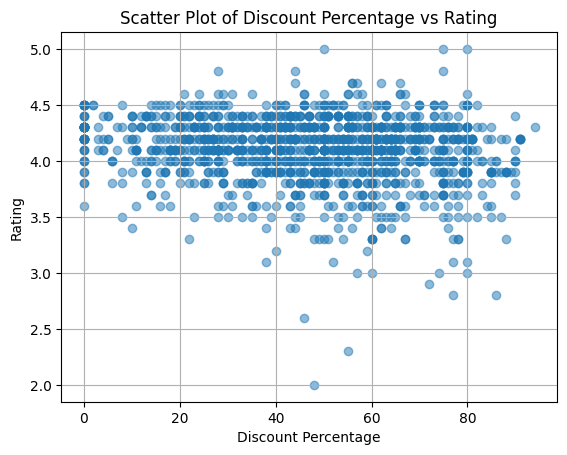

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(filtered_data['discount_percentage'], filtered_data['rating'], alpha=0.5)
plt.title('Scatter Plot of Discount Percentage vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


# **Scatter Plot: Discount Percentage vs. Rating**

### Overview:
The scatter plot visualizes the relationship between the `discount_percentage` and `rating` of products. Each point in the chart represents a product, with:
- The x-axis showing the **discount percentage**.
- The y-axis showing the corresponding **rating**.

---

### Key Observations:
1. **Cluster of Ratings Around 4-5**:
   - Most ratings are concentrated between 4.0 and 4.5, irrespective of the discount percentage.
   - This suggests that customers generally give high ratings, even for products with significant discounts.

2. **Low Ratings for High Discounts**:
   - Some products with very high discounts (e.g., above 60%) have ratings below 4.0.
   - This aligns with the weak negative correlation observed in the Pearson correlation analysis, where higher discounts slightly correspond to lower ratings.

3. **Minimal Variation Across Discounts**:
   - For products with discounts in the range of 0-50%, ratings appear relatively stable, indicating that moderate discounts do not significantly influence customer ratings.

4. **Outliers**:
   - A few outliers are visible where products have very low ratings (<3.0) or unusually high discounts (>80%). These may indicate specific products with quality or functionality issues.

---

### Interpretation:
1. **Customer Expectations**:
   - Higher discounts might raise customer expectations, leading to slightly lower ratings if the product does not meet these expectations.
   - Alternatively, higher discounts might apply to products with lower demand or quality, explaining the slight dip in ratings.

2. **General Satisfaction**:
   - The concentration of ratings around 4.0-4.5 indicates that customers are generally satisfied with the majority of products, regardless of the discount offered.


---

### Conclusion:
The scatter plot reinforces the weak negative correlation observed in the Pearson analysis. While discount percentage does not strongly affect customer ratings, high discounts might be associated with slightly lower ratings due to customer expectations or product quality. Further analysis at the category or product level can uncover deeper insights.


In [ ]:
# Calculate review lengths
data['review_length'] = data['review_content'].str.len()

# T-Test
positive_reviews = data[data['sentiment'] == 'positive']['review_length']
negative_reviews = data[data['sentiment'] == 'negative']['review_length']

t_stat, p = ttest_ind(positive_reviews, negative_reviews, equal_var=False)

print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant difference in review length between positive and negative sentiments.")
else:
    print("No significant difference in review length between positive and negative sentiments.")


T-Test Results:
T-Statistic: 3.4366667481611484
P-value: 0.0018722276089388236
There is a significant difference in review length between positive and negative sentiments.


# **T-Test: Review Lengths by Sentiment**

### Objective:
The T-test was conducted to evaluate whether there is a significant difference in the lengths of reviews associated with **positive sentiments** and **negative sentiments**.

### Results:
- **T-Statistic**: 3.44
- **P-value**: 0.0019

### Interpretation:
1. **Significant Difference**:
   - The p-value (0.0019) is less than the significance threshold of 0.05, indicating that we reject the null hypothesis.
   - This means there is a **statistically significant difference** in the average lengths of reviews between positive and negative sentiments.

2. **Lengthier Negative Reviews**:
   - The positive T-statistic suggests that reviews with negative sentiments are longer, on average, than those with positive sentiments.
   - This could indicate that dissatisfied customers tend to write more detailed feedback to explain their issues or complaints.

3. **Concise Positive Reviews**:
   - Positive reviews might be more concise, often focusing on quick praises like "Good product" or "Value for money," as observed in earlier word cloud analyses.

---

### Possible Reasons:
1. **Emotional Investment**:
   - Customers who are unhappy with their purchase are likely to elaborate on their experiences, providing detailed explanations of what went wrong or how the product failed to meet their expectations.
   - Satisfied customers, on the other hand, may simply express brief approval without additional details.

2. **Product Complexity**:
   - Negative reviews might also reflect complex problems requiring more explanation, while positive experiences are often straightforward and need less description.

---



In [ ]:
print(data.columns)  # Check all column names


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'sentiment'],
      dtype='object')


In [ ]:
# Calculate review lengths
data['review_length'] = data['review_content'].str.len()


In [ ]:
# Fill missing review content with an empty string before calculating length
data['review_content'] = data['review_content'].fillna('')


<ipython-input-28-62f9a350d22c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data, palette='viridis')


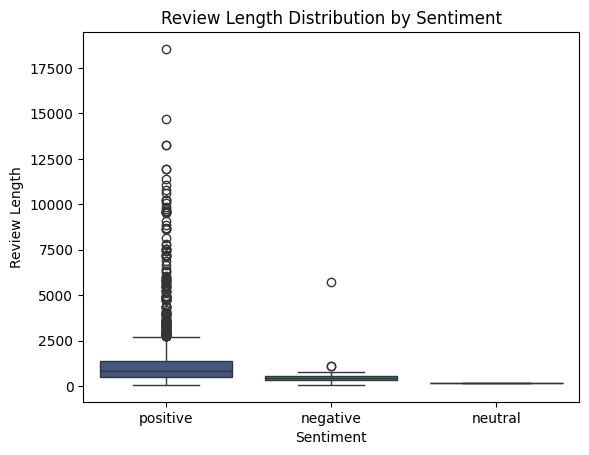

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment', y='review_length', data=data, palette='viridis')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


# **Review Length Distribution by Sentiment**

### Overview:
The boxplot provides a visual representation of the distribution of review lengths (in terms of the number of characters) for each sentiment category: **positive**, **neutral**, and **negative**.

---

### Key Observations:
1. **Positive Sentiments with Longer Reviews**:
   - Positive reviews generally have a wider range of lengths compared to negative and neutral reviews.
   - There are several extreme outliers in positive reviews with review lengths exceeding 5,000 and even 17,500 characters.
   - The median review length for positive reviews is relatively higher compared to other sentiments.

2. **Negative Sentiments**:
   - Negative reviews have a narrower distribution of lengths, with most reviews being shorter than 2,000 characters.
   - There are fewer extreme outliers compared to positive reviews, but some negative reviews are relatively long, possibly indicating customers elaborating on issues.

3. **Neutral Sentiments**:
   - Neutral reviews have the shortest review lengths overall, with minimal variation and no visible outliers.
   - This indicates that neutral reviews are often concise and might lack detailed descriptions.

---

### Interpretation:
1. **Customer Behavior**:
   - Positive sentiments are often associated with longer reviews, potentially because satisfied customers elaborate on multiple positive aspects of a product.
   - Negative sentiments, while shorter on average, may still contain detailed feedback when customers express dissatisfaction.
   - Neutral sentiments reflect a lack of strong opinions, leading to shorter and less descriptive reviews.

2. **Outliers in Positive Reviews**:
   - The extremely long positive reviews might represent overly detailed accounts or bulk text, such as copied specifications or irrelevant content.


---

### Conclusion:
The boxplot reveals significant differences in review length distributions across sentiment categories, with positive reviews being more diverse and longer. Negative reviews tend to be detailed but less variable, while neutral reviews are generally short and concise.
